In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# Random Variables

Let $v$ be a random variable.

Expected value $E[v]$ is the mean: 
* $E[v] = \bar{v} = \frac{1}{N}\sum_{1}^{N}v_i$

Expected value of a vector:
* $E[\mathbf{v}] = \mathbf{\bar{v}} = [\bar{x}_1,...,\bar{x}_n]^\top$

Variance is $E[(v-E[v])^2]$:
* $\sigma^2=E[(v-\bar{v})^2]=\frac{1}{N}\sum_{1}^{N}(v_i-\bar{v})^2$

Standard deviation is the square root of variance:
* $\sigma$

Covariance matrix is $E\big[ (\mathbf{x}-E[\mathbf{x}])(\mathbf{x}-E[\mathbf{x}])^{\top} \big]$, size $N \times N$:
* $R_{ij}=\frac{1}{N}\sum_{k=1}^{N}(x_{ik}-\bar{x}_i)(x_{jk}-\bar{x}_j)$
* $R = \mathbf{v} \mathbf{v}^{\top}$

In [2]:
t = np.linspace(0, 6, 2000)

noise_mean = 0
noise_std_1 = 90
v = np.column_stack(np.random.normal(noise_mean, noise_std_1, len(t))).T

In [3]:
N = scipy.stats.norm(noise_mean, noise_std_1)
xr = np.linspace(-300, 300, 1000)
pdf = N.pdf(xr)

# Histogram

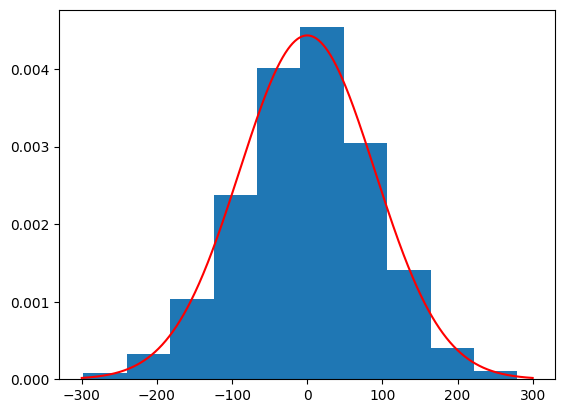

In [4]:
plt.hist(v, density=True)
plt.plot(xr, pdf, color='red')

# Covariance matrix

In [9]:
v = np.column_stack(np.random.normal(noise_mean, noise_std_1, 4)).T
print(v@v.T)

[[ 8476.12977247   372.69581419 -9431.20995104   958.52940249]
 [  372.69581419    16.38745201  -414.69073338    42.14658172]
 [-9431.20995104  -414.69073338 10493.90742335 -1066.53535066]
 [  958.52940249    42.14658172 -1066.53535066   108.39600621]]


# Empirical convariance matrix

In [10]:
R = []

for i in range(1000):
    v = np.column_stack(np.random.normal(noise_mean, noise_std_1, 4)).T
    Ri = v@v.T
    R.append(Ri)

In [11]:
Rstack = np.dstack(R)

In [12]:
print( np.mean(Rstack, 2) )

[[7995.05674129 -326.97668121  106.82004376  135.48851511]
 [-326.97668121 8138.61411521 -248.786141   -289.51559286]
 [ 106.82004376 -248.786141   8017.68753767 -334.12040026]
 [ 135.48851511 -289.51559286 -334.12040026 8824.53925286]]


# Exercises

1. Print out the true covariance matrix. How does the empirical covariance matrix compare?
2. Increase the number of iterations (by a lot) in the empirical covariance matrix. How does it compare to the true covariance now?